<a href="https://colab.research.google.com/github/swetasainiac-24/Amazon-mobile-data-insights/blob/main/Task2_EDA%2B_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving amazon_products.csv to amazon_products.csv


In [ ]:
import pandas as pd
df = pd.read_csv("amazon_products.csv")
df.head()


,Name,Price,Rating,Link
0,POCO M6 Plus 5G Ice Silver 8GB RAM 128GB ROM,10299,4.0 out of 5 stars,NaN
1,"Redmi A4 5G (Sparkle Purple, 6GB RAM, 128GB St...",9299,4.0 out of 5 stars,NaN
2,"POCO C71, Cool Blue (6GB, 128GB)",6799,4.1 out of 5 stars,NaN
3,"realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...",10499,4.2 out of 5 stars,NaN
4,OnePlus Nord 5 | Snapdragon 8s Gen 3 | Stable ...,37998,4.4 out of 5 stars,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    17 non-null     object 
 1   Price   17 non-null     int64  
 2   Rating  17 non-null     object 
 3   Link    0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 676.0+ bytes


In [ ]:
df.isna().sum()


,0
Name,0
Price,0
Rating,0
Link,17


In [ ]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [ ]:
df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+)')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [ ]:
df_clean = df.dropna(subset=['Price'])
df_clean.head()


,Name,Price,Rating,Link
0,POCO M6 Plus 5G Ice Silver 8GB RAM 128GB ROM,10299,4.0,NaN
1,"Redmi A4 5G (Sparkle Purple, 6GB RAM, 128GB St...",9299,4.0,NaN
2,"POCO C71, Cool Blue (6GB, 128GB)",6799,4.1,NaN
3,"realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...",10499,4.2,NaN
4,OnePlus Nord 5 | Snapdragon 8s Gen 3 | Stable ...,37998,4.4,NaN


In [ ]:
len(df_clean)


17

In [ ]:
df_clean.loc[df_clean['Price'].idxmax()]


,4
Name,OnePlus Nord 5 | Snapdragon 8s Gen 3 | Stable ...
Price,37998
Rating,4.4
Link,NaN


In [ ]:
df_clean.loc[df_clean['Price'].idxmin()]


,2
Name,"POCO C71, Cool Blue (6GB, 128GB)"
Price,6799
Rating,4.1
Link,NaN


In [ ]:
df_clean['Price'].mean()


np.float64(14383.058823529413)

In [ ]:
df_clean['Rating'].mean()


np.float64(4.094117647058824)

In [ ]:
df_clean[df_clean['Rating'] > 4.0].shape[0]


9

In [ ]:
df_clean.to_csv("amazon_products_cleaned.csv", index=False)


# **TASK 3**

---



In [ ]:
import pandas as pd

df = pd.read_csv("/content/amazon_products_cleaned.csv")
df.head()


,Name,Price,Rating,Link
0,POCO M6 Plus 5G Ice Silver 8GB RAM 128GB ROM,10299,4.0,NaN
1,"Redmi A4 5G (Sparkle Purple, 6GB RAM, 128GB St...",9299,4.0,NaN
2,"POCO C71, Cool Blue (6GB, 128GB)",6799,4.1,NaN
3,"realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...",10499,4.2,NaN
4,OnePlus Nord 5 | Snapdragon 8s Gen 3 | Stable ...,37998,4.4,NaN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


In [ ]:
df = pd.read_csv("/content/amazon_products_cleaned.csv")
df.head()



,Name,Price,Rating,Link
0,POCO M6 Plus 5G Ice Silver 8GB RAM 128GB ROM,10299,4.0,NaN
1,"Redmi A4 5G (Sparkle Purple, 6GB RAM, 128GB St...",9299,4.0,NaN
2,"POCO C71, Cool Blue (6GB, 128GB)",6799,4.1,NaN
3,"realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...",10499,4.2,NaN
4,OnePlus Nord 5 | Snapdragon 8s Gen 3 | Stable ...,37998,4.4,NaN


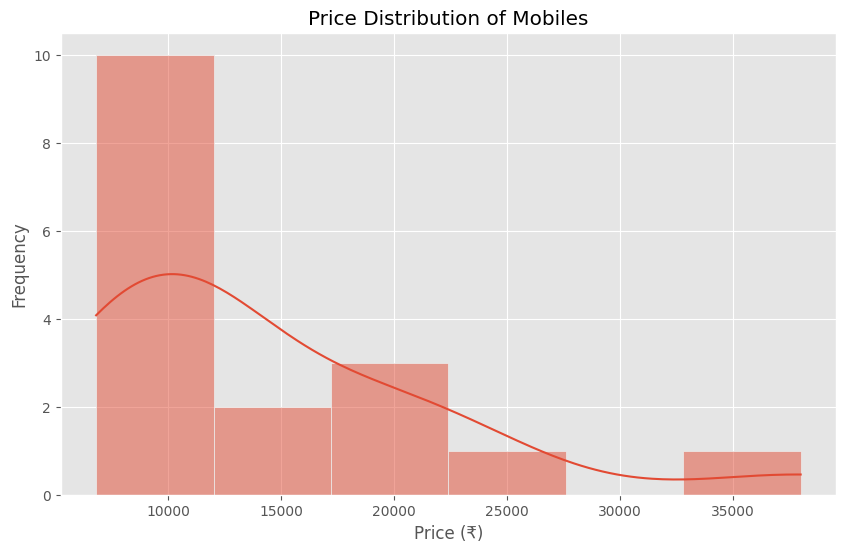

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution of Mobiles")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()


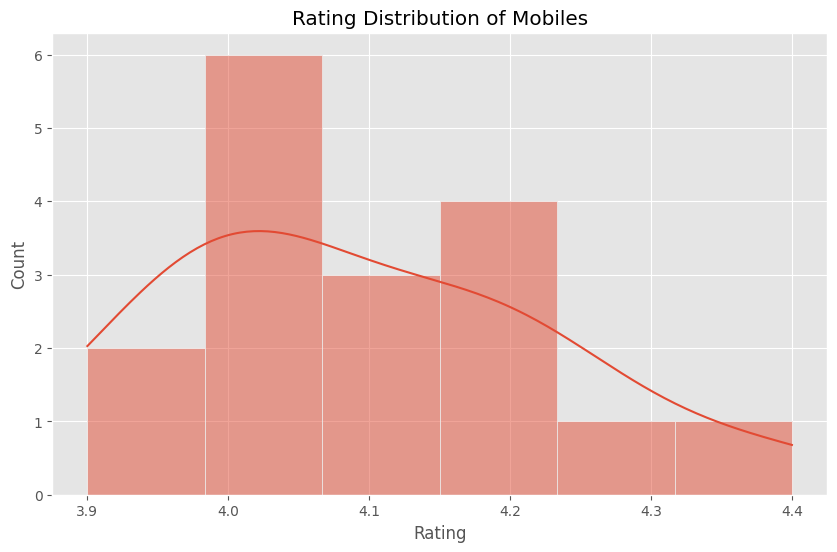

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'], kde=True)
plt.title("Rating Distribution of Mobiles")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


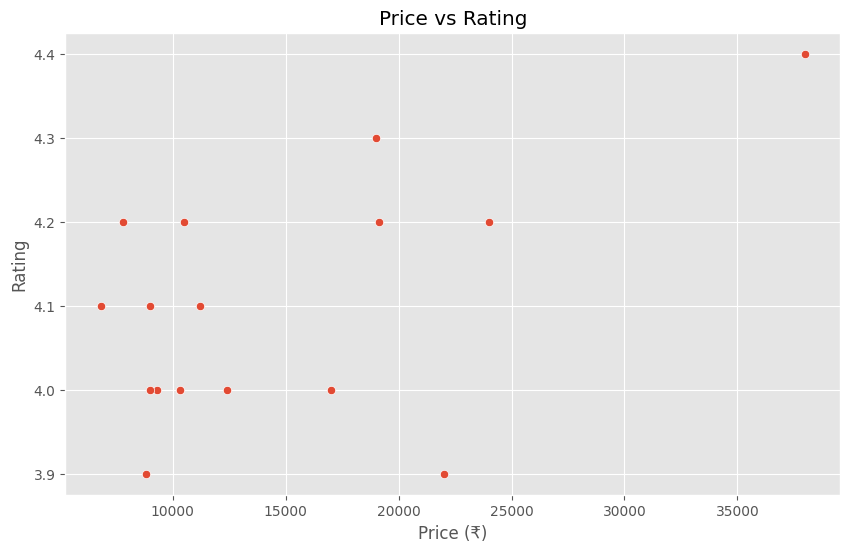

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title("Price vs Rating")
plt.xlabel("Price (₹)")
plt.ylabel("Rating")
plt.show()


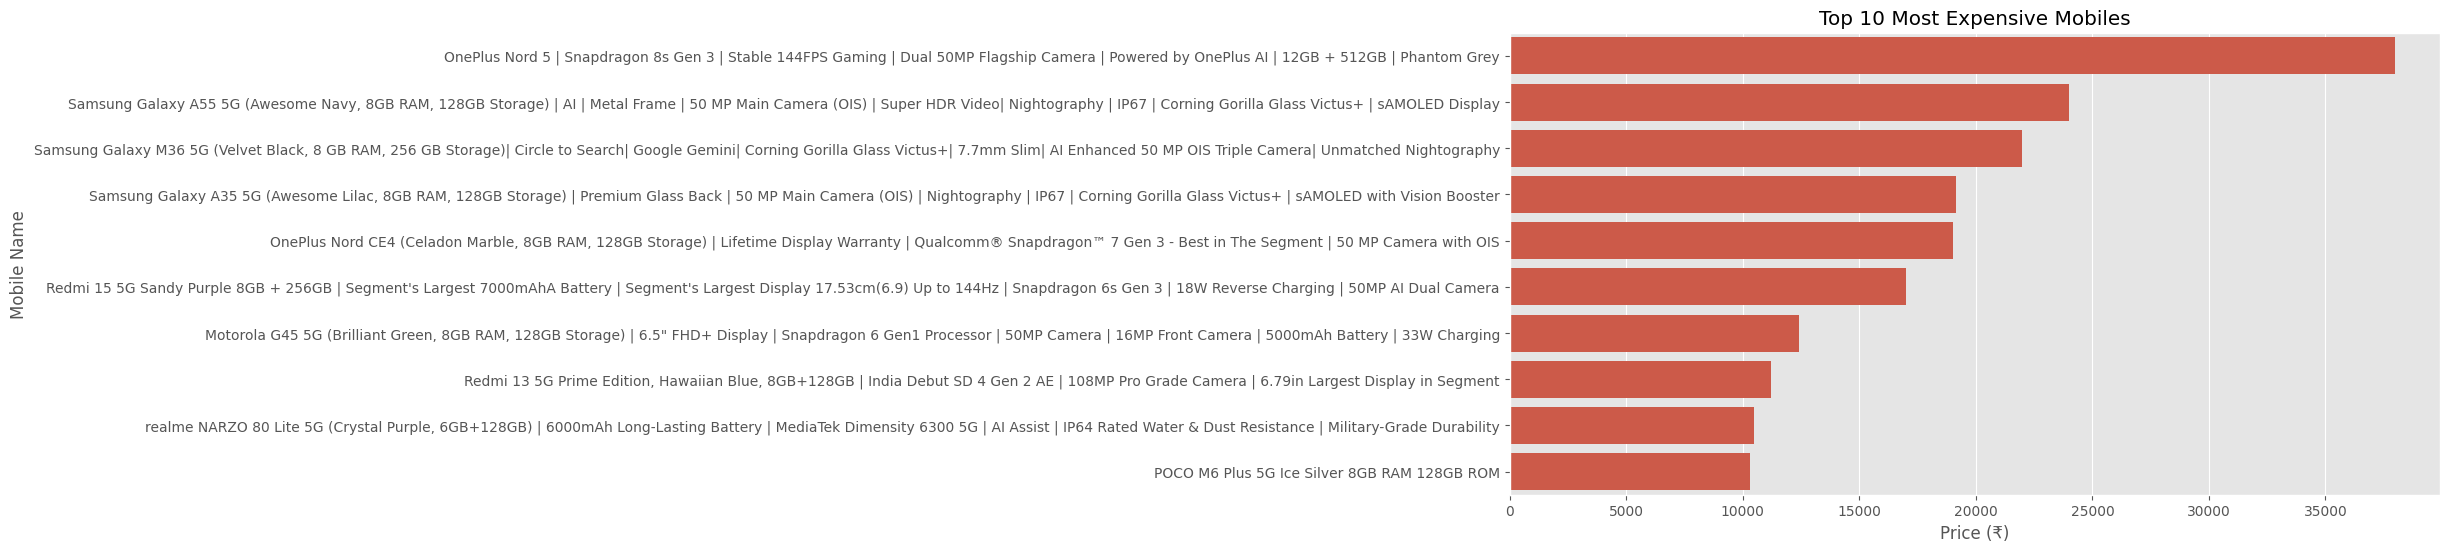

In [ ]:
top10 = df.nlargest(10, 'Price')

plt.figure(figsize=(12,6))
sns.barplot(x='Price', y='Name', data=top10)
plt.title("Top 10 Most Expensive Mobiles")
plt.xlabel("Price (₹)")
plt.ylabel("Mobile Name")
plt.show()


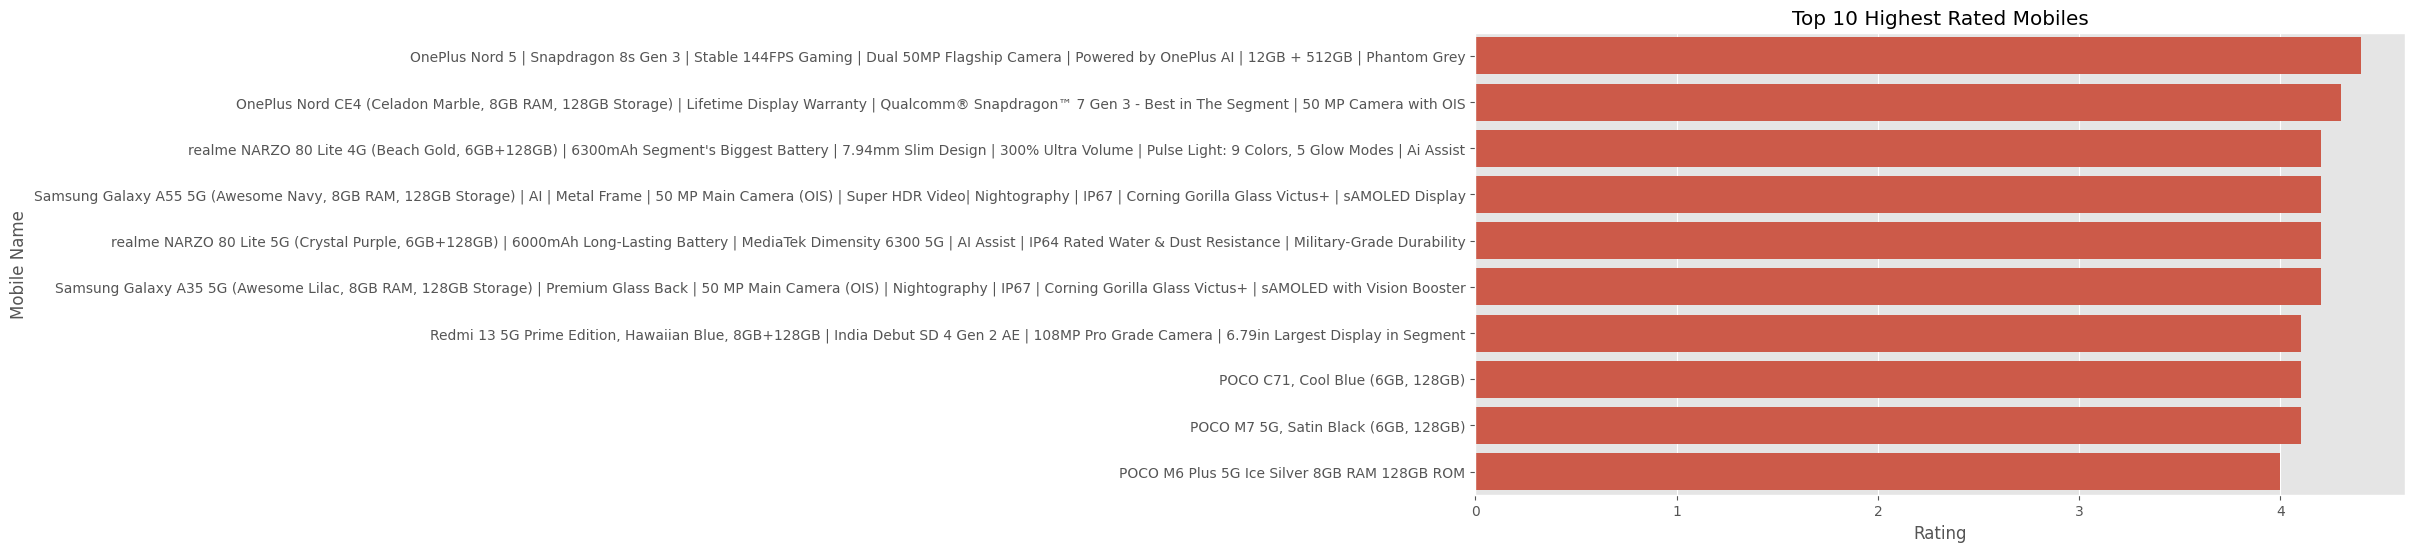

In [ ]:
top_rated = df.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Rating', y='Name', data=top_rated)
plt.title("Top 10 Highest Rated Mobiles")
plt.xlabel("Rating")
plt.ylabel("Mobile Name")
plt.show()


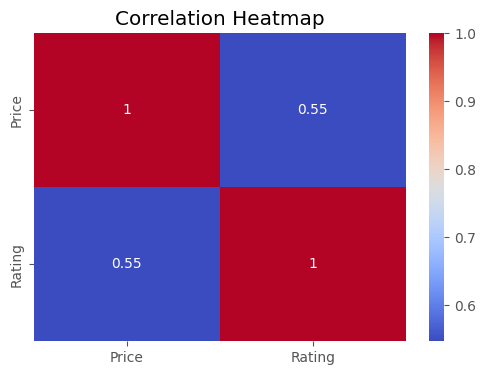

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Price','Rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
